In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
hospital_df = pd.read_csv('/content/drive/MyDrive/Platzi-master/data_analysis/first_analysis/db/hospital-charges.csv')

In [4]:
#Let's see how the dataframe is 
hospital_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [5]:
#Analize the columns 
hospital_df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [6]:
hospital_df.dtypes

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object

In [7]:
hospital_df.describe(include='all')

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065,163065.000000,163065,163065,163065,163065,163065.000000,163065,163065.000000,163065,163065,163065
unique,100,NaN,3201,3326,1977,51,NaN,306,NaN,160236,147842,150328
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,NaN,GOOD SAMARITAN HOSPITAL,100 MEDICAL CENTER DRIVE,CHICAGO,CA,NaN,CA - Los Angeles,NaN,$31155.00,$4370.00,$5372.00
freq,3023,NaN,633,183,1505,13064,NaN,3653,NaN,4,9,5
mean,NaN,255569.865428,NaN,NaN,NaN,NaN,47938.121908,NaN,42.776304,NaN,NaN,NaN
std,NaN,151563.671767,NaN,NaN,NaN,NaN,27854.323080,NaN,51.104042,NaN,NaN,NaN
min,NaN,10001.000000,NaN,NaN,NaN,NaN,1040.000000,NaN,11.000000,NaN,NaN,NaN
25%,NaN,110092.000000,NaN,NaN,NaN,NaN,27261.000000,NaN,17.000000,NaN,NaN,NaN
50%,NaN,250007.000000,NaN,NaN,NaN,NaN,44309.000000,NaN,27.000000,NaN,NaN,NaN
75%,NaN,380075.000000,NaN,NaN,NaN,NaN,72901.000000,NaN,49.000000,NaN,NaN,NaN


In [8]:
#Check for null values 
hospital_df.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [9]:
#The prices have the $ and pandas takes them as string. So we replace the $
hospital_df[' Average Covered Charges '] = pd.to_numeric(hospital_df[' Average Covered Charges '].str.replace('$',''))
hospital_df[' Average Total Payments '] = pd.to_numeric(hospital_df[' Average Total Payments '].str.replace('$',''))
hospital_df['Average Medicare Payments'] = pd.to_numeric(hospital_df['Average Medicare Payments'].str.replace('$',''))




In [10]:
hospital_df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [11]:

hospital_df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


#Lets analyze by state to find out which state is the most expensive 

In [12]:
hospital_df['Provider State'] = pd.Categorical(hospital_df['Provider State'].apply(str))

In [13]:
hospital_df.dtypes

DRG Definition                            object
Provider Id                                int64
Provider Name                             object
Provider Street Address                   object
Provider City                             object
Provider State                          category
Provider Zip Code                          int64
Hospital Referral Region Description      object
 Total Discharges                          int64
 Average Covered Charges                 float64
 Average Total Payments                  float64
Average Medicare Payments                float64
dtype: object

In [14]:
df_organized = hospital_df.set_index(['Provider State']).sort_index()
df_organized.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider State,,,,,,,,,,,
AK,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,20012,FAIRBANKS MEMORIAL HOSPITAL,1650 COWLES STREET,FAIRBANKS,99701,AK - Anchorage,13,109476.92,77566.38,76608.53
AK,481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,20026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DR,ANCHORAGE,99508,AK - Anchorage,18,38800.77,23783.44,22841.88
AK,481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,20012,FAIRBANKS MEMORIAL HOSPITAL,1650 COWLES STREET,FAIRBANKS,99701,AK - Anchorage,13,54546.38,26139.92,25102.38
AK,481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,99519,AK - Anchorage,26,66346.50,16523.88,15662.96
AK,389 - G.I. OBSTRUCTION W CC,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,99519,AK - Anchorage,14,29477.92,8797.92,6749.00


In [15]:
hospital_df['DRG Definition'].value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG Definition, Length: 100, dtype: int64

In [16]:
hospital_df['DRG Definition'].value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG Definition, Length: 100, dtype: int64

In [17]:
df_organized.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [18]:
df_organized.tail()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider State,,,,,,,,,,,
WY,378 - G.I. HEMORRHAGE W CC,530010,LANDER REGIONAL HOSPITAL,1320 BISHOP RANDALL DR,LANDER,82520,WY - Casper,14,17995.14,7647.00,6769.00
WY,378 - G.I. HEMORRHAGE W CC,530011,MEMORIAL HOSPITAL SWEETWATER COUNTY,1200 COLLEGE DRIVE,ROCK SPRINGS,82901,UT - Salt Lake City,11,15760.09,10190.00,9166.72
WY,378 - G.I. HEMORRHAGE W CC,530012,WYOMING MEDICAL CENTER,1233 EAST 2ND ST,CASPER,82601,WY - Casper,39,24035.97,8260.41,5977.05
WY,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,530006,SHERIDAN MEMORIAL HOSPITAL,1401 W 5TH ST,SHERIDAN,82801,MT - Billings,33,28328.27,12550.39,11696.69
WY,300 - PERIPHERAL VASCULAR DISORDERS W CC,530012,WYOMING MEDICAL CENTER,1233 EAST 2ND ST,CASPER,82601,WY - Casper,15,15799.00,7070.40,5978.93


In [19]:
df_organized.groupby('DRG Definition')[' Average Total Payments '].sum()

DRG Definition
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                      7510416.19
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                           8054238.01
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                   22004682.41
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                    17976540.82
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC              10319457.31
                                                                                ...     
885 - PSYCHOSES                                                               4271826.51
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC     4484616.02
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                                9073895.55
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                              6198793.41
948 - SIGNS & SYMPTOMS W/O MCC                                                8650806.22
Name: 

In [20]:
df_organized.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider Zip Code',
       'Hospital Referral Region Description', ' Total Discharges ',
       ' Average Covered Charges ', ' Average Total Payments ',
       'Average Medicare Payments'],
      dtype='object')

In [21]:
most_expensive_states = hospital_df.groupby('Provider State')[' Average Total Payments '].median().sort_values(ascending=False)
most_expensive_states


Provider State
AK    11190.080
HI    10148.470
DC     9674.820
CA     9378.010
MD     9124.530
VT     9038.380
NY     8770.130
WY     8614.380
CT     8486.630
OR     7984.860
NJ     7950.240
WA     7856.525
RI     7795.985
DE     7790.755
AZ     7671.360
MA     7648.350
NV     7471.880
ND     7441.730
MN     7363.800
UT     7357.040
MI     7337.720
NM     7313.890
ID     7280.540
IL     7262.640
SD     7231.115
MT     7228.905
CO     7075.100
NH     7002.260
NE     6994.555
WI     6970.795
NC     6955.810
TX     6927.475
PA     6851.850
ME     6802.275
SC     6773.550
GA     6699.030
MO     6596.090
IN     6595.335
VA     6579.580
OH     6578.980
FL     6555.250
LA     6515.910
KS     6404.620
IA     6384.710
KY     6352.940
OK     6295.630
MS     6187.835
TN     6184.575
AR     6151.680
WV     6102.370
AL     5876.370
Name:  Average Total Payments , dtype: float64

#TOP 5 ESTADOS MÁS CAROS Y  MÁS BARATOS

In [22]:
#Most expensive states 
top_5_expensive = most_expensive_states[:5]
top_5_expensive


Provider State
AK    11190.08
HI    10148.47
DC     9674.82
CA     9378.01
MD     9124.53
Name:  Average Total Payments , dtype: float64

In [23]:
#Chepear states
top_5_cheaper = most_expensive_states.sort_values(ascending=True)[:5]
top_5_cheaper

Provider State
AL    5876.370
WV    6102.370
AR    6151.680
TN    6184.575
MS    6187.835
Name:  Average Total Payments , dtype: float64

In [24]:
hospital_df[' Average Covered Charges ']-hospital_df[' Average Total Payments ']-hospital_df['Average Medicare Payments']

0         22422.10
1          4367.57
2         27671.63
3          4451.56
4         21123.50
            ...   
163060    19436.14
163061    15027.64
163062    29359.01
163063    14361.46
163064     8614.84
Length: 163065, dtype: float64

In [25]:
hospital_df.groupby(['Provider Name', 'Provider State'])[' Average Total Payments '].median().sort_values(ascending=True)

Provider Name                               Provider State
TURNING POINT HOSPITAL                      GA                3291.31
COMMUNITY GENERAL HOSPITAL                  TX                3623.44
WILMINGTON TREATMENT CENTER                 NC                3639.47
BRIGHTON HOSPITAL                           MI                3736.00
SACRED HEART HOSPITAL ON THE GULF           FL                3810.81
                                                               ...   
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER  VT                    NaN
                                            WA                    NaN
                                            WI                    NaN
                                            WV                    NaN
                                            WY                    NaN
Name:  Average Total Payments , Length: 163251, dtype: float64

In [26]:
hospital_df.groupby('Provider State')[' Average Total Payments '].describe()

,count,mean,std,min,25%,50%,75%,max
Provider State,,,,,,,,
AK,231.0,14572.391732,10439.549042,4717.04,8394.8600,11190.080,17149.8150,77566.38
AL,3635.0,7568.232149,5240.269866,2682.64,4391.4100,5876.370,8971.8000,48198.38
AR,2067.0,8019.248805,5683.371139,2845.78,4492.0600,6151.680,9705.9400,57325.95
AZ,2851.0,10154.528211,7395.819875,3002.00,5611.3000,7671.360,12092.7400,71437.35
CA,13064.0,12629.668472,10165.995338,3465.00,6785.8250,9378.010,14612.5200,156158.18
CO,1890.0,9502.685550,7085.648749,3171.91,5201.7500,7075.100,11283.9750,68294.66
CT,2011.0,11365.450671,8541.605347,3605.00,6264.4700,8486.630,13386.5300,73887.44
DC,462.0,12998.029416,10977.144909,3247.18,6824.6175,9674.820,14854.9950,99067.50
DE,394.0,10360.072411,7685.621933,3562.13,5558.2125,7790.755,12412.2375,50707.91


In [30]:
dashboard_data = hospital_df.groupby(['Provider Name', 'Provider State'])[' Average Total Payments '].median().sort_values(ascending=True)

In [28]:
dashboard_data.to_csv("dashboard_data.csv")

In [31]:
second_dasboard =  hospital_df.groupby('Provider Zip Code')[' Average Total Payments '].mean().sort_values(ascending=True)
second_dasboard

Provider Zip Code
31788     3291.310000
78017     3623.440000
28401     3639.470000
48116     3736.000000
60452     3847.630000
             ...     
94143    23364.711750
94305    24354.784138
83001    25329.143333
93635    25592.872500
81657    42446.710000
Name:  Average Total Payments , Length: 3053, dtype: float64

In [32]:
second_dasboard.to_csv("second_dashboard.csv")

In [33]:
data_described = hospital_df.groupby('Provider State')[' Average Total Payments '].describe()

In [34]:
data_described.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

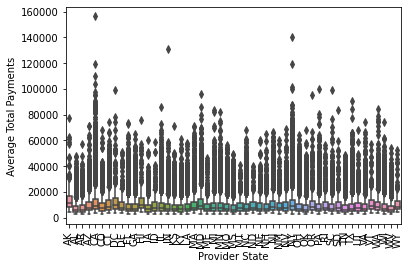

In [35]:
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(10, 20)})
ax = sns.boxplot(x="Provider State", y=" Average Total Payments ", data=hospital_df)

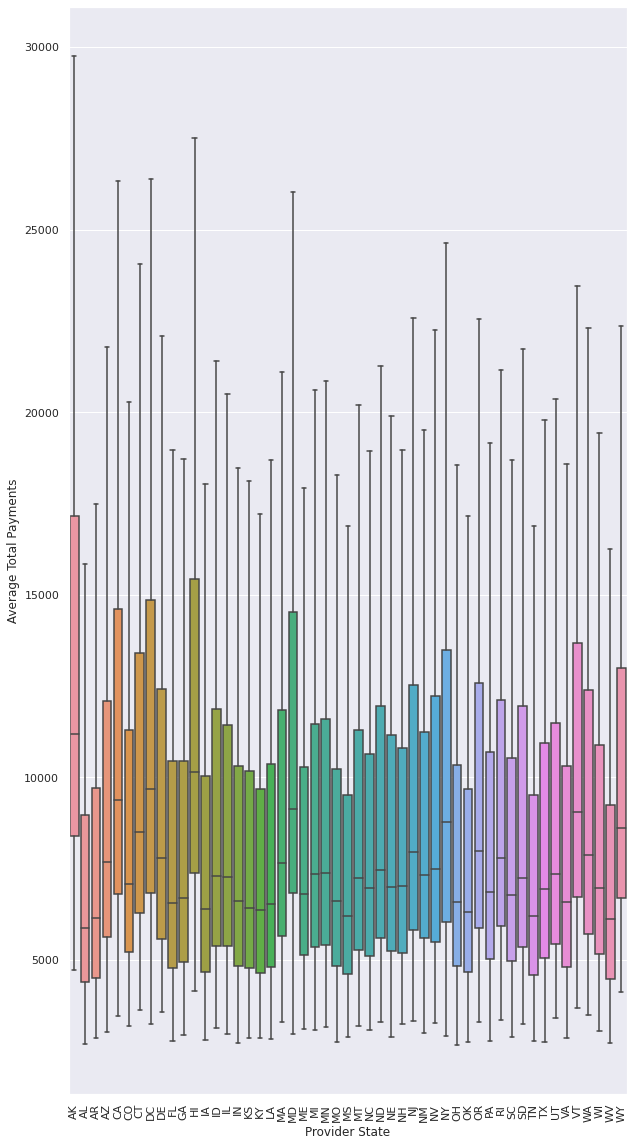

In [36]:
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(20, 20)})
ax = sns.boxplot(x="Provider State", y=" Average Total Payments ", data=hospital_df, showfliers=False)

In [37]:
data_for_bigger_map = hospital_df.groupby(['DRG Definition','Provider State'])[' Average Total Payments '].describe()

In [38]:
data_for_bigger_map

count  ...       max
DRG Definition                           Provider State         ...          
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC AK                1.0  ...   8401.95
                                         AL               23.0  ...   8031.12
                                         AR               16.0  ...   9838.11
                                         AZ               24.0  ...  11026.33
                                         CA               67.0  ...  16744.82
...                                                        ...  ...       ...
948 - SIGNS & SYMPTOMS W/O MCC           VT                3.0  ...   7147.31
                                         WA               30.0  ...   8771.80
                                         WI               39.0  ...   7411.21
                                         WV               18.0  ...   5676.60
                                         WY                3.0  ...   6889.33

[5025 rows x 8 columns]

In [ ]:
data_for_bigger_map.to_csv("final_dashboard.csv")